In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import csv
import matplotlib.ticker as mtick
import datetime
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from textblob import TextBlob
from tabulate import tabulate

In [27]:
df = pd.read_csv("covid_comments.csv")
df.head()
#The file is imported. This alerts me to some columns that have mixed data types. We'll do our best to 
#clean this data up, but I'm not using any of these flagged columns.

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_86998/3046960946.py:1: DtypeWarning: Columns (14,17,35,43,49,53,54,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("covid_comments.csv")


,all_awardings,associated_award,author,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,can_gild,can_mod_post,collapsed,collapsed_because_crowd_control,collapsed_reason,comment_type,controversiality,created_utc,distinguished,edited,gilded,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,permalink,quarantined,removal_reason,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,author_cakeday,archived,collapsed_reason_code,name,retrieved_utc,score_hidden,author_is_blocked,unrepliable_reason,editable
0,[],NaN,rolacl,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_78vawltu,False,False,[],Welcome ! We can start the conversation.,False,False,False,NaN,NaN,NaN,0,1606263159,moderator,False,0,{},gdi1xf0,True,t3_k0gw81,False,True,t3_k0gw81,/r/CovidVaccinated/comments/k0gw81/rcovidvaccinated_lounge/gdi1xf0/,False,NaN,1.617600e+09,1,True,False,CovidVaccinated,t5_3gppqs,r/CovidVaccinated,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],NaN,rolacl,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_78vawltu,False,False,[],I don’t think that we will have much data on the best vaccine for different population groups in...,True,False,False,NaN,NaN,NaN,0,1606265621,NaN,False,0,{},gdi6g0m,False,t3_k0hqx8,False,True,t3_k0hqx8,/r/CovidVaccinated/comments/k0hqx8/covid_positive_pre_vaccine/gdi6g0m/,False,NaN,1.617602e+09,3,True,False,CovidVaccinated,t5_3gppqs,r/CovidVaccinated,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],NaN,ericks24,1.534475e+09,NaN,NaN,[],NaN,NaN,NaN,text,t2_1333832u,False,False,[],I would separate the US and Europe. There are many things permitted in the US (from a food &amp;...,True,False,False,NaN,NaN,NaN,0,1606265772,NaN,False,0,{},gdi6pwo,False,t3_k0h22o,False,True,t3_k0h22o,/r/CovidVaccinated/comments/k0h22o/what_vaccines_will_you_trust_the_most/gdi6pwo/,False,NaN,1.617602e+09,2,True,False,CovidVaccinated,t5_3gppqs,r/CovidVaccinated,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],NaN,tukekairo,1.398134e+09,NaN,NaN,[],NaN,NaN,NaN,text,t2_g8rc9,False,False,[],It might be good to learn the demographic standards used in each vaccine trial. For example I vo...,True,False,False,NaN,NaN,NaN,0,1606265839,NaN,False,0,{},gdi6u8h,True,t3_k0hqx8,False,True,t3_k0hqx8,/r/CovidVaccinated/comments/k0hqx8/covid_positive_pre_vaccine/gdi6u8h/,False,NaN,1.617602e+09,2,True,False,CovidVaccinated,t5_3gppqs,r/CovidVaccinated,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],NaN,rolacl,NaN,NaN,NaN,[],NaN,NaN,NaN,text,t2_78vawltu,False,False,[],Ur right. Many health agencies involved.,True,False,False,NaN,NaN,NaN,0,1606266020,NaN,False,0,{},gdi7646,True,t3_k0h22o,False,True,t1_gdi6pwo,/r/CovidVaccinated/comments/k0h22o/what_vaccines_will_you_trust_the_most/gdi7646/,False,NaN,1.617602e+09,1,True,False,CovidVaccinated,t5_3gppqs,r/CovidVaccinated,public,NaN,0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#COLUMNS FOR ANALYSIS
columns_for_analysis = ['author', 'body', 'collapsed', 'collapsed_because_crowd_control', 'collapsed_reason',
       'controversiality', 'created_utc', 'distinguished', 'link_id','id', 'locked', 'score', 'collapsed_reason_code', 'stickied']
df = df[columns_for_analysis]

In [29]:
### CLEANUP
# df = df.replace({np.nan: None}) THIS IS THE SAME AS USING INPLACE=TRUE
df.replace({np.nan: None}, inplace=True)

#Convert the date column to a datetime data type
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

#Set the date column as the DataFrame's index
df.set_index('created_utc', inplace=True)

df.head()

,author,body,collapsed,collapsed_because_crowd_control,collapsed_reason,controversiality,distinguished,link_id,id,locked,score,collapsed_reason_code,stickied
created_utc,,,,,,,,,,,,,
2020-11-25 00:12:39,rolacl,Welcome ! We can start the conversation.,False,None,None,0,moderator,t3_k0gw81,gdi1xf0,False,1,None,False
2020-11-25 00:53:41,rolacl,I don’t think that we will have much data on the best vaccine for different population groups in...,False,None,None,0,None,t3_k0hqx8,gdi6g0m,False,3,None,False
2020-11-25 00:56:12,ericks24,I would separate the US and Europe. There are many things permitted in the US (from a food &amp;...,False,None,None,0,None,t3_k0h22o,gdi6pwo,False,2,None,False
2020-11-25 00:57:19,tukekairo,It might be good to learn the demographic standards used in each vaccine trial. For example I vo...,False,None,None,0,None,t3_k0hqx8,gdi6u8h,False,2,None,False
2020-11-25 01:00:20,rolacl,Ur right. Many health agencies involved.,False,None,None,0,None,t3_k0h22o,gdi7646,False,1,None,False


### Descriptive Stats

##### Number of Comments per Day

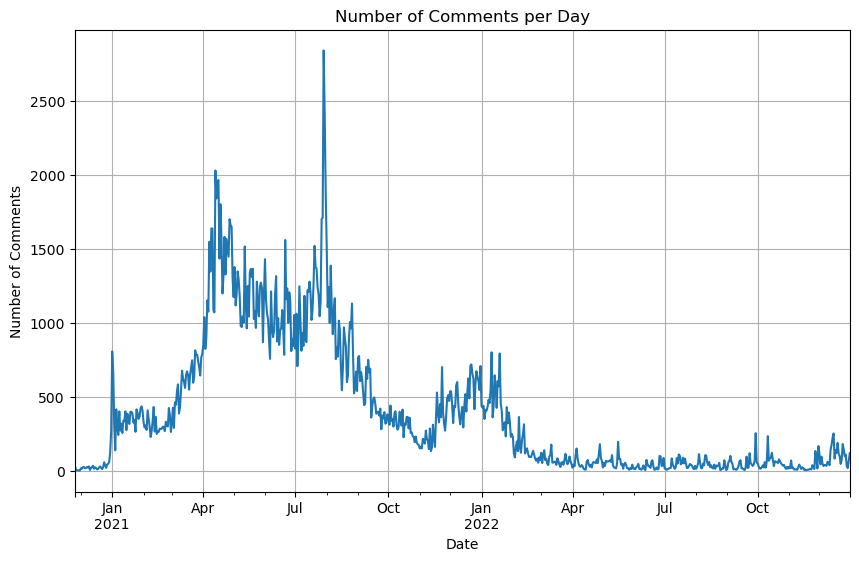

In [5]:
# Resample on daily
comments_per_day = df.resample('D').size()

# Plot
plt.figure(figsize=(10, 6))
comments_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Number of Comments per Day')
plt.grid(True)
plt.show()

##### Average comment score per day

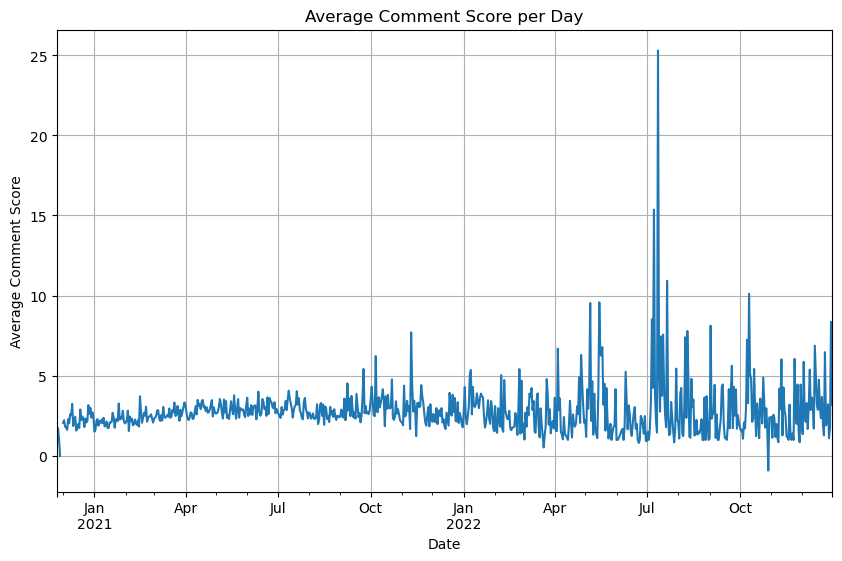

In [6]:
# Resample the data to daily frequency and calculate the average comment score per day
average_score_per_day = df.resample('D')['score'].mean()

# Plot the average comment score per day
plt.figure(figsize=(10, 6))
average_score_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Average Comment Score')
plt.title('Average Comment Score per Day')
plt.grid(True)
plt.show()

##### Top 20 Commenters

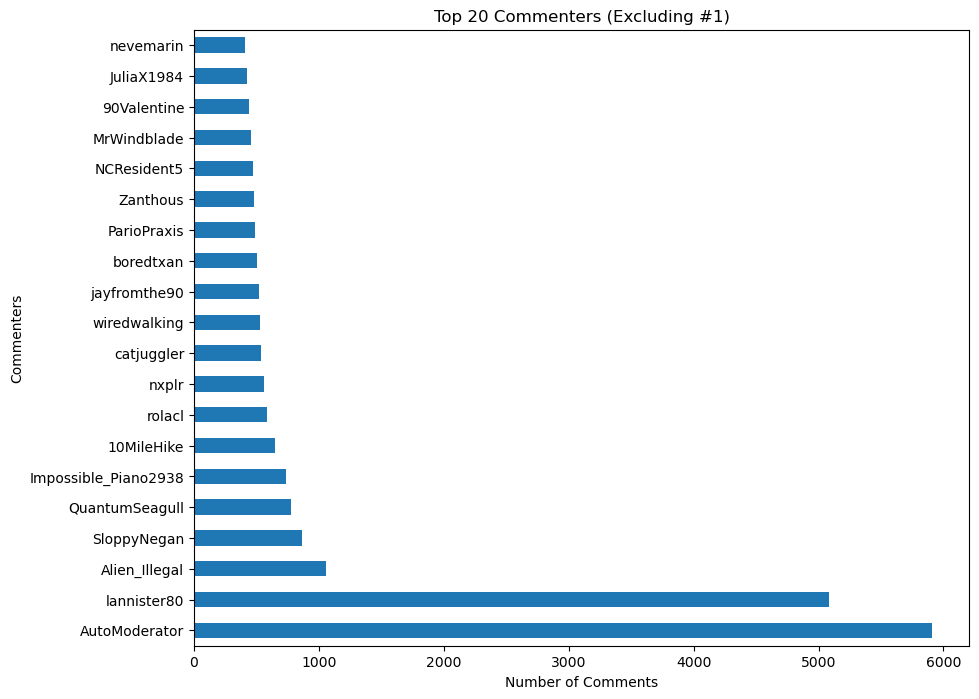

In [7]:
top_commenters = df['author'].value_counts().head(21)[1:]  # Exclude the top result

plt.figure(figsize=(10, 8))
top_commenters.plot(kind='barh')
plt.xlabel('Number of Comments')
plt.ylabel('Commenters')
plt.title('Top 20 Commenters (Excluding #1)')
plt.show()

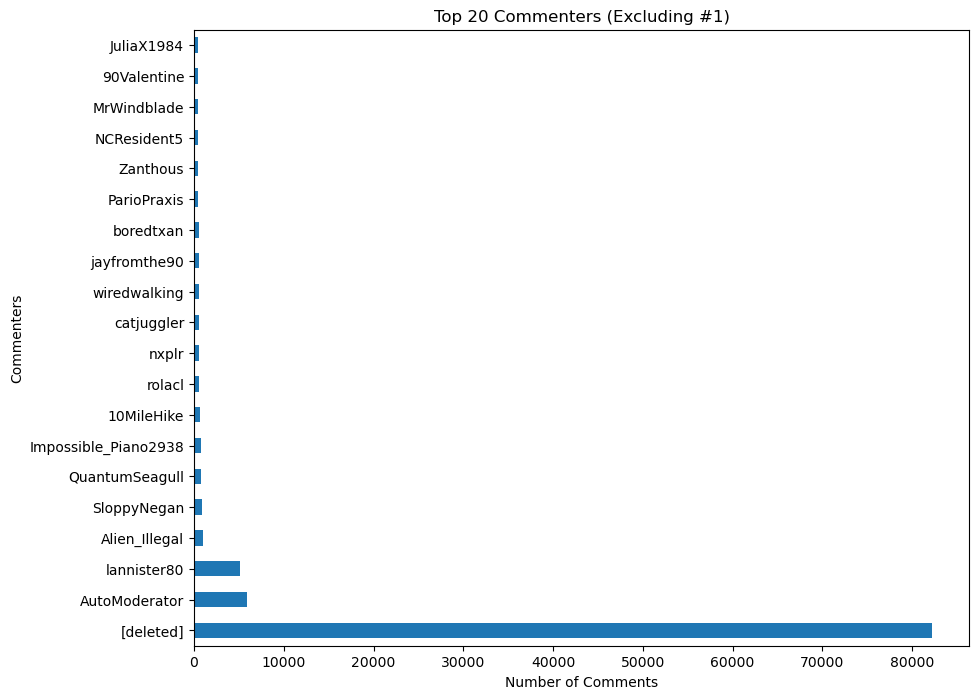

In [37]:
top_commenters = df['author'].value_counts().head(20)  # include top result

plt.figure(figsize=(10, 8))
top_commenters.plot(kind='barh')
plt.xlabel('Number of Comments')
plt.ylabel('Commenters')
plt.title('Top 20 Commenters (Excluding #1)')
plt.show()

##### Top 20 Commenters: List

In [8]:
top_commenters_list = df['author'].value_counts().head(20)
print(top_commenters_list)

[deleted]               82216
AutoModerator            5909
lannister80              5085
Alien_Illegal            1054
SloppyNegan               864
QuantumSeagull            778
Impossible_Piano2938      739
10MileHike                651
rolacl                    583
nxplr                     560
catjuggler                535
wiredwalking              528
jayfromthe90              521
boredtxan                 503
ParioPraxis               488
Zanthous                  477
NCResident5               475
MrWindblade               455
90Valentine               443
JuliaX1984                423
Name: author, dtype: int64


##### Score x Controversiality

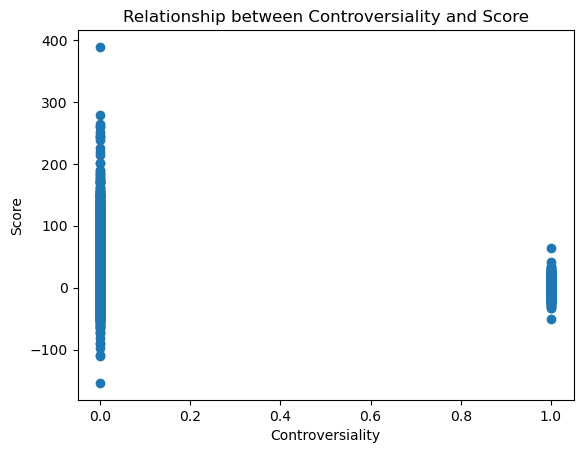

In [9]:
# Filter the data
filtered_data_score_cont = df[['score', 'controversiality']]

# Create the scatter plot
plt.scatter(filtered_data_score_cont['controversiality'], filtered_data_score_cont['score'])
plt.xlabel('Controversiality')
plt.ylabel('Score')
plt.title('Relationship between Controversiality and Score')
plt.show()

##### What are the top-scoring comments in this subreddit? 

In [12]:
# Set display options for better readability
pd.set_option('display.max_colwidth', 90)
pd.set_option('display.width', 200)

# Retrieve the top 10 comments with the highest 'score' and display the 'body' and 'score'
top_comments = df.nlargest(10, 'score')
top_comments_data = top_comments[['body', 'score']]
print(top_comments_data)

                    body                                                                                        score
created_utc                                                                                                          
2021-07-28 17:04:46                                                                                  [deleted]  389  
2021-09-01 21:47:23  This is scary stuff. \n\nAnd I say that as someone who is partially vaccinated with th...  279  
2022-07-12 21:28:02  Can someone explain to me how vaccines designed two years ago against the Wuhan strain...  265  
2022-01-10 19:49:50                                                                                         No  262  
2021-10-01 11:57:15  So Oxford university conducted a research on their own product, and came to a conclusi...  259  
2021-12-18 13:21:39         It's kinda sad how people have to say they are not anti-vaxer when questioning it.  252  
2021-07-28 17:01:05                                     

##### What are the top-scoring comments in this subreddit? (Full Text)

In [18]:
# Set display options for better visibility
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.colheader_justify', 'left')

# Retrieve the top 10 comments with the highest 'score' and display the 'body' and 'score'
top_comments = df.nlargest(10, 'score')[['body', 'score']]

# Remove the index (created_utc) from the DataFrame
top_comments.reset_index(drop=True, inplace=True)

# Display the comments with left-aligned full comment (body)
print(top_comments.to_string(index=False, justify='left'))

body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  score
                                                                                                                                                                                                                                                                                                                                                                                                                                            

##### What are the most common words in this subreddit?

In [11]:
# Count the frequency of each word
word_counts = Counter(df['body'])

# Get the most common words and their frequencies
top_words = word_counts.most_common(100)

# Drop the first three items from the resulting list
top_words = top_words[3:] # Dropping the first three items because those are 'Deleted', 'Removed' and the sub
# description

print(top_words)

#Interesting to see single-word responses at the top of the list, 'Yes' and 'No'
#Also interesting to see r/vaccinelonghauler relatively high up this list. 

[('Thank you!', 342), ('Thanks!', 119), ('Thank you', 111), ('Yes', 100), ('No', 92), ('How are you feeling now?', 81), ('https://www.reddit.com/r/vaccinelonghauler/', 79), ('Thanks', 62), ('Thank you!!', 61), ('How are you doing now?', 57), ('Yes.', 54), ('Lol', 52), ('Thank you.', 52), ('Source?', 52), ('How are you now?', 52), ('Pfizer', 50), ('No.', 50), ('Same', 49), ('Thank you so much!', 41), ('Nope', 40), ('Thanks for sharing', 35), ('Thanks for sharing!', 33), ('Hey how are you feeling now, did the dizzy symptoms from the vaccine go away? &amp; how', 33), ('Congrats!', 31), ('Any update?', 31), ('Why?', 31), ('Watch Dr. Hoffe interview clip (8 minutes) half way down blog. This is a great basic description of the pathogenesis of this mRNA injection.\r  \n\r  \nhttps://thecovidblog.com/2021/07/26/jordan-hayes-33-year-old-new-york-man-calls-the-non-vaccinated-idiots-and-morons-dead-14-weeks-after-covid-19-vaccine/', 27), ('Good luck!', 26), ('Which vaccine did you get?', 26), ('R

##### Wordclouds for word frequency at 3 intervals: Q1 2021, Q3 2021, and Q1 2022

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_91989/1784013171.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  filtered_data = df.loc[start_date:end_date]


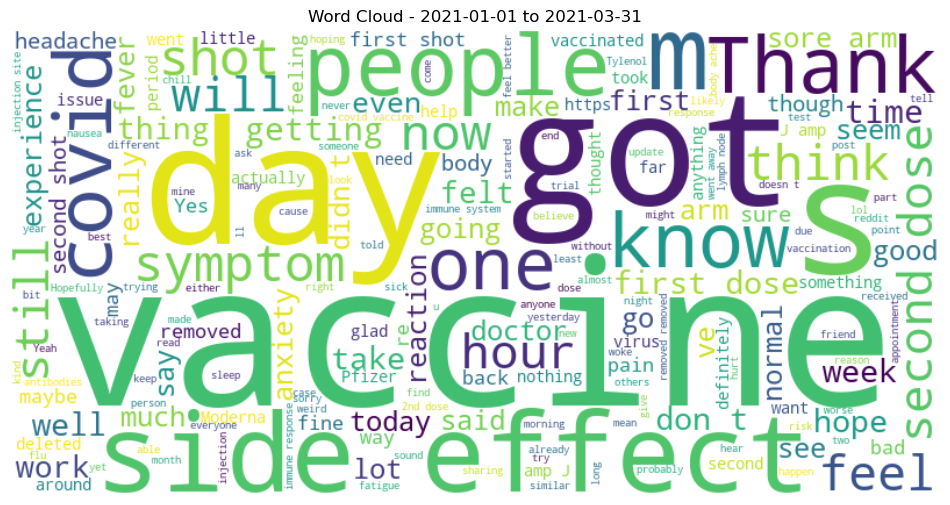

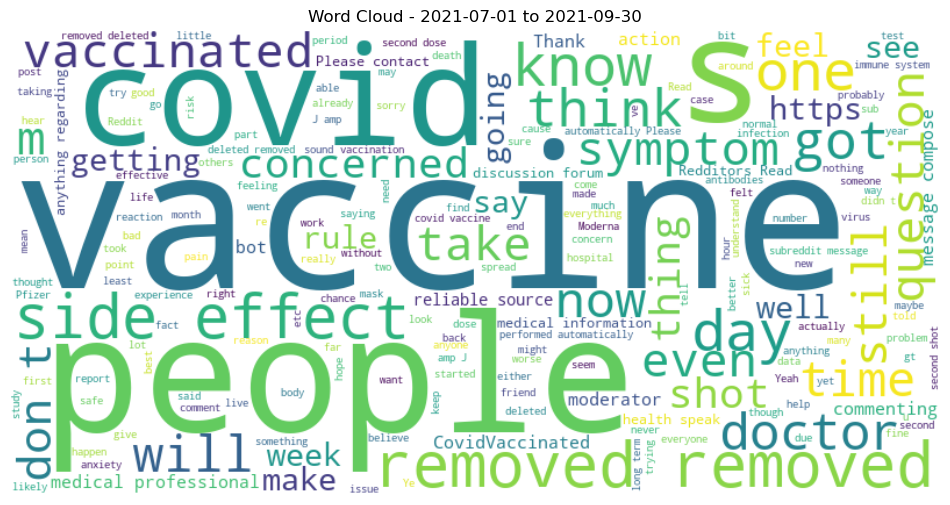

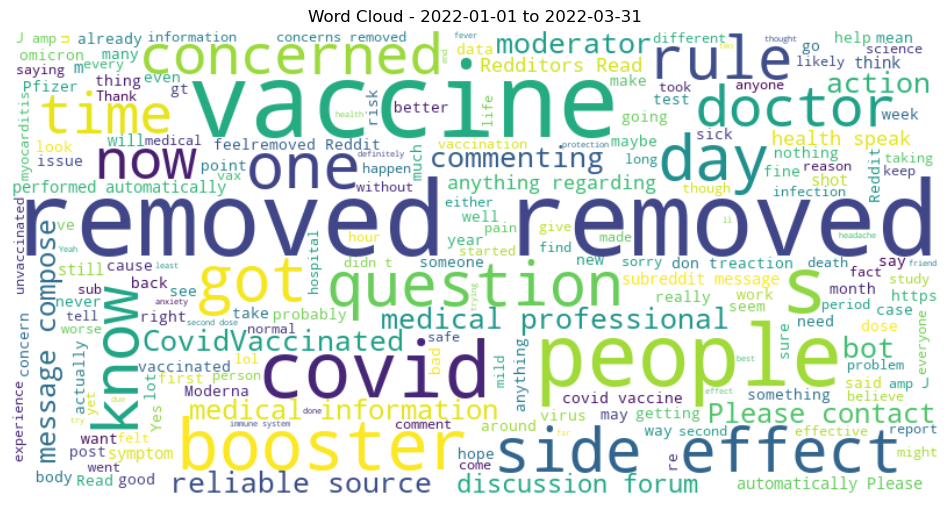

In [12]:
# Define the time intervals
time_intervals = [('2021-01-01', '2021-03-31'), ('2021-07-01', '2021-09-30'), ('2022-01-01', '2022-03-31')]

# Generate word clouds for each time interval
for start_date, end_date in time_intervals:
    # Filter the data within the time interval
    filtered_data = df.loc[start_date:end_date]

    # Concatenate the bodies within the time interval
    bodies = ' '.join(filtered_data['body'])

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(bodies)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - {} to {}'.format(start_date, end_date))

    # Show the plot
    plt.show()

#### Textblob: Polarity Score for December 2020 - December 2022

/var/folders/2z/z3kg4msd25n_41p2vbwjskxr0000gn/T/ipykernel_86998/248952110.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, text in df['body'].iteritems():


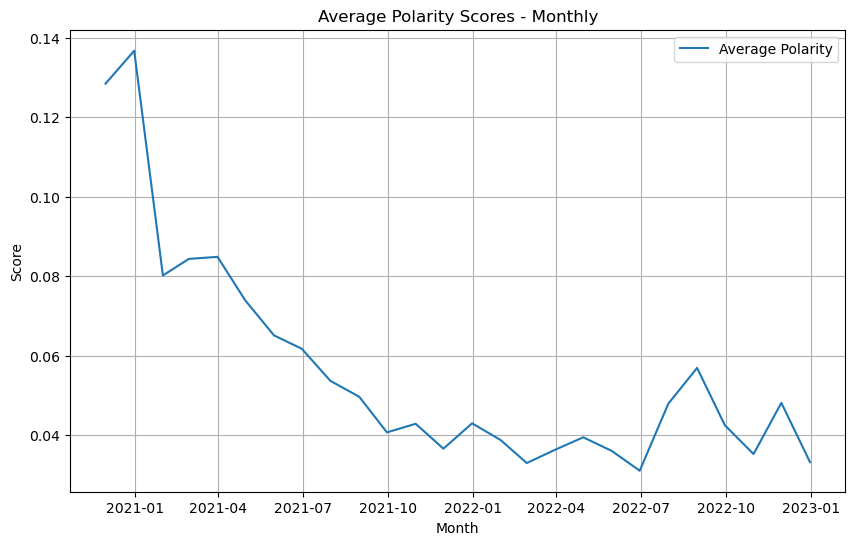

Average Polarity Score: 0.05614414654269779


In [77]:
# Calculate polarity scores for each body text
polarity_scores = []
for index, text in df['body'].iteritems():
    polarity_scores.append(TextBlob(str(text)).sentiment.polarity)

# Convert the polarity scores to a Pandas Series
polarity_series = pd.Series(polarity_scores, index=df.index)

# Resample the polarity scores by month and calculate the average polarity score for each month
monthly_polarity = polarity_series.resample('M').mean()

# Plot the polarity scores over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_polarity.index, monthly_polarity, label='Average Polarity')
plt.xlabel('Month')
plt.ylabel('Score')
plt.title('Average Polarity Scores - Monthly')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the average polarity score
average_polarity = monthly_polarity.mean()
print(f'Average Polarity Score: {average_polarity}')

#### Ratio of jab to side effects

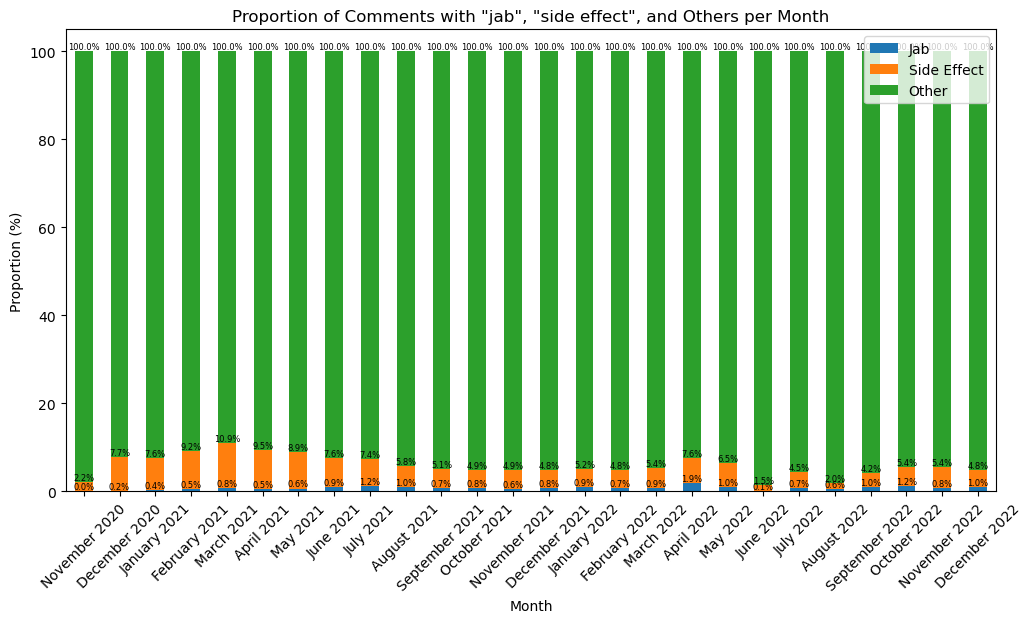

In [68]:
# Resample the data by month and count the total number of comments per month
total_comments_per_month = df.resample('M').size()

# Calculate the number of comments mentioning "jab" per month
jab_count_per_month = df['body'].str.contains('jab', case=False).resample('M').sum()

# Calculate the number of comments mentioning "side effect" per month
side_effect_count_per_month = df['body'].str.contains('side effect', case=False).resample('M').sum()

# Calculate the number of comments not mentioning "jab" or "side effect" per month
other_count_per_month = total_comments_per_month - jab_count_per_month - side_effect_count_per_month

# Calculate the proportions per month
jab_proportion_per_month = jab_count_per_month / total_comments_per_month * 100
side_effect_proportion_per_month = side_effect_count_per_month / total_comments_per_month * 100
other_proportion_per_month = other_count_per_month / total_comments_per_month * 100

# Create a DataFrame with the proportions per month
proportions_df = pd.DataFrame({'Jab': jab_proportion_per_month,
                               'Side Effect': side_effect_proportion_per_month,
                               'Other': other_proportion_per_month})

# Format the index to display as "Month Year"
proportions_df.index = proportions_df.index.strftime('%B %Y')

# Set the figure size before creating the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the width as desired

# Plot the proportions as a stacked bar chart
proportions_df.plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Proportion (%)')
plt.title('Proportion of Comments with "jab", "side effect", and Others per Month')

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=6, color='black')

# Display the plot
plt.show()

#### Take the top 500 comments to hand-code and then feed to text classifier 

In [36]:
# Sort the comments by score in descending order
sorted_comments = df.sort_values('score', ascending=False)

# Retrieve the top 500 comments
top_500_comments = sorted_comments.head(500)

# Export the top comments to a CSV file
top_500_comments.to_csv('top_comments.csv', index=False)